In [57]:
import pandas as pd
import requests
import folium
import matplotlib.pyplot as plt

In [58]:
url_catalogue = "https://ressources.data.sncf.com/api/v2/catalog/exports/json?limit=-1&offset=0&timezone=UTC"

catalogue = requests.get(url_catalogue)
wb_cata = catalogue.json()

df_cata = pd.DataFrame(wb_cata)
pd.DataFrame(df_cata['dataset_id']).head(3)

,dataset_id
0,rapports-irc
1,saisines-avis-mediateur-sncf
2,images-des-feux-de-circulation-ferroviaire-en-...


In [63]:
url_resultats = "https://ressources.data.sncf.com/api/v2/catalog/datasets/comptes-resultats-gares/exports/json?limit=-1&offset=0&timezone=UTC"
resultats = requests.get(url_resultats)
wb_resultats = resultats.json()

df_resultats = pd.DataFrame(wb_resultats)
df_resultats

,region,gare,chiffre_d_affaires,opex,impots_et_taxes,marge_operationnelle,poids_du_passe,investissements_previsionnels,resultat_operationnel_courant,resultat_financier,resultat_avant_is
0,Haute-Normandie,GARES B HAUTE NORMANDIE,4.725101e+05,5.122167e+05,130153.477129,-169860.140938,63103.95838,82267.451788,-315231.551106,55439.498604,-370671.049710
1,Ile de France,GARES C DDGT,3.200625e+04,4.067714e+05,13288.748395,-388053.854077,58992.00546,5945.854318,-452991.713855,27464.481745,-480456.195600
2,Auvergne,GARES B AUVERGNE,3.150734e+05,5.312233e+05,49611.489093,-265761.374606,53167.30780,30244.681509,-349173.363915,25746.046338,-374919.410253
3,Rhône-Alpes,GARE GRENOBLE,1.496748e+06,1.216031e+06,102549.438859,178167.266713,89909.87268,88840.012638,-582.618604,54201.766795,-54784.385399
4,Picardie,GARE AMIENS,3.736596e+06,3.267968e+06,67079.828199,401548.625863,588163.12009,181795.003333,-368409.497560,189219.698257,-557629.195817
...,...,...,...,...,...,...,...,...,...,...,...
511,PACA,GARE MONACO MONTE CARLO,1.743012e+06,1.377429e+06,NaN,365582.809698,54168.56006,2642.666667,308771.582971,17967.258693,290804.324278
512,Pays-de-la-Loire,GARE LA ROCHE SUR YON,4.729730e+05,3.586634e+05,4110.510674,110199.039118,71344.08896,8917.066882,29937.883276,17779.240553,12158.642723
513,Bretagne,GARE SAINT MALO,1.087286e+06,8.983462e+05,143764.852919,45175.097525,231411.21996,339.800000,-186575.922435,57316.261560,-243892.183995
514,Bretagne,GARE GUINGAMP,7.279363e+04,4.345349e+04,2807.132436,26533.011742,7305.39751,12182.229712,7045.384520,6676.876606,368.507914


In [68]:
df_resultats.drop(['region','opex','impots_et_taxes','marge_operationnelle','poids_du_passe','resultat_operationnel_courant','resultat_financier'], axis=1)


,gare,chiffre_d_affaires,investissements_previsionnels,resultat_avant_is
0,GARES B HAUTE NORMANDIE,4.725101e+05,82267.451788,-370671.049710
1,GARES C DDGT,3.200625e+04,5945.854318,-480456.195600
2,GARES B AUVERGNE,3.150734e+05,30244.681509,-374919.410253
3,GARE GRENOBLE,1.496748e+06,88840.012638,-54784.385399
4,GARE AMIENS,3.736596e+06,181795.003333,-557629.195817
...,...,...,...,...
511,GARE MONACO MONTE CARLO,1.743012e+06,2642.666667,290804.324278
512,GARE LA ROCHE SUR YON,4.729730e+05,8917.066882,12158.642723
513,GARE SAINT MALO,1.087286e+06,339.800000,-243892.183995
514,GARE GUINGAMP,7.279363e+04,12182.229712,368.507914


In [95]:
from sklearn import svm
import numpy as np
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [96]:

df_resultats = df_resultats.dropna(subset=['investissements_previsionnels'])

In [97]:
#régression linéaire vis à vis du chiffre d'affaires
x = df_resultats[['chiffre_d_affaires']]
y = df_resultats[['investissements_previsionnels']].values.ravel()

In [105]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
xtest

,chiffre_d_affaires
55,3.584298e+06
177,1.997153e+06
262,1.290894e+07
405,1.587974e+06
295,4.992401e+05
...,...
314,7.904848e+05
374,1.026922e+06
372,7.225796e+05
443,6.654964e+07


In [117]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)
reg.coef_
reg.intercept_

24690.14063683944

In [121]:
ypred = reg.predict(xtest)
ypred

array([  93292.64614803,   62915.1176996 ,  271763.82752079,
         55083.52764886,   34245.46164071,   31073.74184595,
        147971.69777859,   68208.68472217,   45500.5033796 ,
         42354.29429525,  217003.81477438,  140960.08208356,
         35778.17287895,  286483.3980572 ,   28641.23802018,
        115975.63449801,   45702.4311485 ,   37904.63154708,
         27709.35962904,  146765.83958703,   28674.11279559,
         36328.01967995,   54082.21996392,   29453.11233744,
        222547.99553896,   37198.68253672,   72470.09846829,
         85102.91092046,   59681.56579695,   26492.57780686,
         49994.08538146,   57490.61602702,   59523.89393489,
         88606.19939993,  126007.03167173,   66095.41414717,
         31067.43333383,   27430.95987794,   42198.8751122 ,
         79420.60039763,   39000.33164276,   90927.68455341,
         47829.48154186,   41708.46842955,   28851.52800035,
         41732.73977502,   34477.71833232,   36252.60237484,
         74924.56008729,

In [122]:
epsilon = ytest - ypred
print(reg.score(xtest, ytest))

0.7885355761533348


Text(0, 0.5, 'investissements_previsionnels')

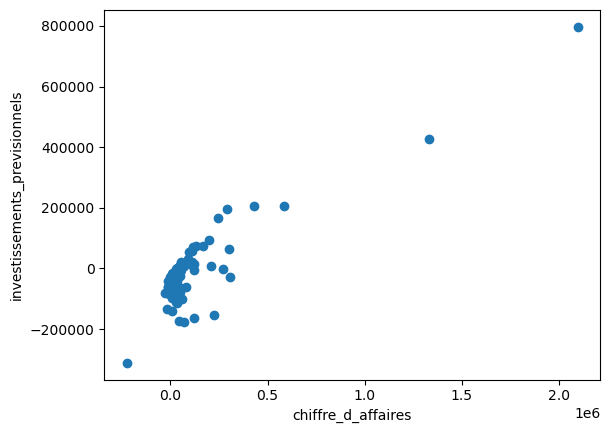

In [123]:
plt.scatter(ytest, epsilon)
plt.xlabel("chiffre_d_affaires")
plt.ylabel("investissements_previsionnels")

In [124]:
#régression linéaire vis à vis du résultat
a = df_resultats[['chiffre_d_affaires']]
b = df_resultats[['investissements_previsionnels']].values.ravel()

In [127]:
atrain, atest, btrain, btest = train_test_split(a, b, test_size=0.2)
atest

,chiffre_d_affaires
202,2.742977e+06
263,8.071296e+05
351,1.184793e+05
297,4.589012e+05
44,2.176473e+05
...,...
293,1.723225e+05
19,1.713738e+06
107,8.630876e+05
262,1.290894e+07


In [129]:
reg.fit(atrain, btrain)
reg.coef_
reg.intercept_

19873.512325891512

In [131]:
bpred = reg.predict(atest)
bpred

array([  72357.15802136,   35316.99283413,   22140.47578482,
         28654.05019415,   24037.93816375,   97255.11105864,
         76994.79380062,   67638.73908553,   54744.48029311,
         34729.59869832,  167974.47807894,   66194.11722469,
         59108.54213891,   37325.46393364,   27438.56645133,
         46707.03007679,   24311.54632545,   74793.70813109,
        151556.01992483,   23856.25618343,   55696.62808952,
         23823.39154366,   57931.03806798,   51685.17711294,
         56231.45940935,   62340.06127989,   39030.74783274,
        151179.48316286,   31893.2955033 ,   26069.00578167,
         53430.06106138,   27936.13703981,   36171.03797738,
         30167.7775091 ,   22509.96349874,   22232.33145173,
         57450.10249548,   38586.26440046,   22851.12514432,
         30235.36426408,   37532.21993689,   45329.02417734,
         64557.22124626,  906212.75842404,   49100.88785224,
         52207.9116821 ,   67859.34951947,   43882.20222232,
         49152.21635056,

In [132]:
epsilon = btest - bpred
print(reg.score(xtest, ytest))

0.7896532339318558


Text(0, 0.5, 'resultat_avant_is')

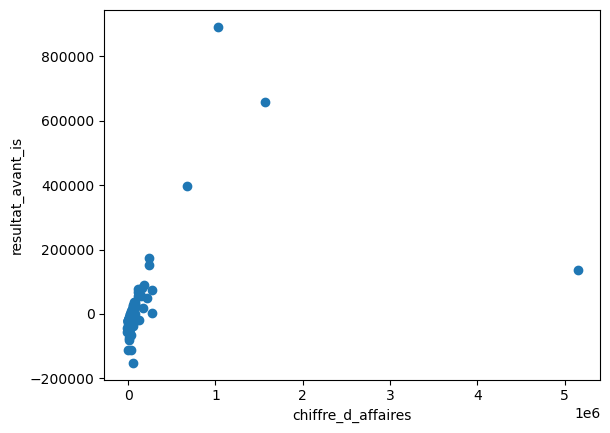

In [133]:
plt.scatter(btest, epsilon)
plt.xlabel("chiffre_d_affaires")
plt.ylabel("resultat_avant_is")

In [ ]:
# Conclusion: on voit que le chiffre d'affaire est bien plus corrélé avec l'investissement des gares que le resultat des gars 